In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ticker = ['TECHM.NS', 'M&M.NS', 'WIPRO.NS', 'SBIN.NS', 'BAJFINANCE.NS',
    'INFY.NS', 'KOTAKBANK.NS', 'TRENT.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS',
    'ADANIPORTS.NS', 'TATAMOTORS.NS', 'AXISBANK.NS', 'COALINDIA.NS', 'HCLTECH.NS',
    'BRITANNIA.NS', 'ICICIBANK.NS', 'LT.NS', 'CIPLA.NS', 'NTPC.NS',
    'BHARTIARTL.NS', 'NESTLEIND.NS', 'TATACONSUM.NS', 'HEROMOTOCO.NS', 'APOLLOHOSP.NS',
    'BEL.NS', 'HDFCBANK.NS', 'HINDALCO.NS', 'TCS.NS', 'SBILIFE.NS',
    'POWERGRID.NS', 'ULTRACEMCO.NS', 'ADANIENT.NS', 'HDFCLIFE.NS', 'GRASIM.NS',
    'ITC.NS', 'DRREDDY.NS', 'RELIANCE.NS', 'ONGC.NS', 'JSWSTEEL.NS',
    'EICHERMOT.NS', 'TITAN.NS', 'SUNPHARMA.NS', 'INDUSINDBK.NS', 'BPCL.NS',
    'MARUTI.NS', 'TATASTEEL.NS', 'BAJAJ-AUTO.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS']

#Directional Accuracy

In [ ]:
def calculate_directional_accuracy(actual, predicted):
    """
    Calculate the directional accuracy of the predictions.

    Parameters:
    actual (list or array): The actual values of the time series.
    predicted (list or array): The predicted values of the time series.

    Returns:
    float: Directional accuracy as a percentage.
    """
    # Calculate the direction (sign) of changes for actual and predicted values
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))

    # Compare the direction of changes and calculate accuracy
    directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
    return directional_accuracy

In [ ]:
data = pd.read_csv('/content/ADANIENT.NS.csv')

In [ ]:
dir_accu_lstm = calculate_directional_accuracy(data['Actual Price'], data['LSTM Forecast'])

In [ ]:
dir_accu_arima = calculate_directional_accuracy(data['Actual Price'], data['ARIMA Forecast'])

In [ ]:
dir_accu_lstm = []
dir_accu_arima = []

In [ ]:
for company in ticker:
  data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/{company}.csv')
  actual = data['Actual Price'].to_list()
  lstm = data['LSTM Forecast'].to_list()
  arima = data['ARIMA Forecast'].to_list()

  dir_acu_lstm = calculate_directional_accuracy(actual, lstm)
  dir_acu_arima = calculate_directional_accuracy(actual, arima)

  dir_accu_lstm.append(dir_acu_lstm)
  dir_accu_arima.append(dir_acu_arima)

  print(f'for {company} Directional Accuracy for LSTM is {dir_acu_lstm} and for ARIMA is {dir_acu_arima}')
  print(f'Process for {company} is completed')

for TECHM.NS Distance for LSTM is 52.63157894736842 and for ARIMA is 63.1578947368421
Process for TECHM.NS is completed
for M&M.NS Distance for LSTM is 42.10526315789473 and for ARIMA is 47.368421052631575
Process for M&M.NS is completed
for WIPRO.NS Distance for LSTM is 57.89473684210527 and for ARIMA is 47.368421052631575
Process for WIPRO.NS is completed
for SBIN.NS Distance for LSTM is 47.368421052631575 and for ARIMA is 36.84210526315789
Process for SBIN.NS is completed
for BAJFINANCE.NS Distance for LSTM is 52.63157894736842 and for ARIMA is 36.84210526315789
Process for BAJFINANCE.NS is completed
for INFY.NS Distance for LSTM is 52.63157894736842 and for ARIMA is 52.63157894736842
Process for INFY.NS is completed
for KOTAKBANK.NS Distance for LSTM is 47.368421052631575 and for ARIMA is 47.368421052631575
Process for KOTAKBANK.NS is completed
for TRENT.NS Distance for LSTM is 52.63157894736842 and for ARIMA is 57.89473684210527
Process for TRENT.NS is completed
for BAJAJFINSV.NS 

In [ ]:
dtw_data = {'Ticker': ticker, 'ACC_LSTM': dir_accu_lstm, 'ACC_ARIMA': dir_accu_arima}

In [ ]:
dtw_data = pd.DataFrame(dtw_data)

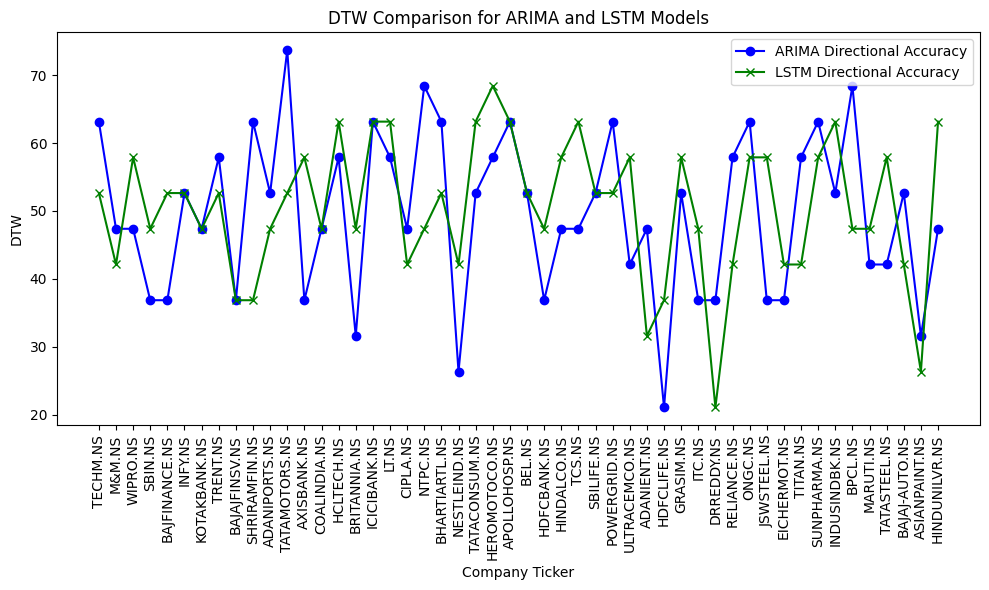

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ticker, dir_accu_arima, label='ARIMA Directional Accuracy', marker='o', color='blue')
plt.plot(ticker, dir_accu_lstm, label='LSTM Directional Accuracy', marker='x', color='green')
plt.xlabel('Company Ticker')
plt.ylabel('DTW')
plt.title('DTW Comparison for ARIMA and LSTM Models')
plt.xticks(rotation=90)  # Rotate ticker labels for better readability
plt.legend()
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/DTW.png', format='png', dpi=300)

In [ ]:
dtw_data.to_csv('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/dtw_values.csv', index=False)

# Mean Directional Accuracy

# Trend Similarity



# Sign Prediction Accuracy

# Hit Rate